<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Introduction to the SpatioTemporal Asset Catalog (STAC)</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/stac/stac-introduction.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Matheus Zaglia<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Rennan Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: May 21, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the STAC service to discover and access the data products from the <em>Brazil Data Cube</em>.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Zaglia, M.; Vinhas, L.; Queiroz, G. R.; Simões, R. <a href="http://urlib.net/rep/8JMKD3MGPDW34R/3UFEFD8" target="_blank">Catalogação de Metadados do Cubo de Dados do Brasil com o SpatioTemporal Asset Catalog</a>. In: Proceedings XX GEOINFO, November 11-13, 2019, São José dos Campos, SP, Brazil. p 280-285.
    </div>
</div>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

# Introduction
<hr style="border:1px solid #0077b9;">

The [**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/) is a specification created through the colaboration of several organizations intended to increase satellite image search interoperability.

The diagram depicted in the picture contains the most important concepts behind the STAC data model:

<center>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-concept.png" width="480" />
<br/>
<b>Figure 1</b> - STAC model.
</center>

The description of the concepts below are adapted from the [STAC Specification](https://github.com/radiantearth/stac-spec):

- **Item**: a `STAC Item` is the atomic unit of metadata in STAC, providing links to the actual `assets` (including thumbnails) that they represent. It is a `GeoJSON Feature` with additional fields for things like time, links to related entities and mainly to the assets. According to the specification, this is the atomic unit that describes the data to be discovered in a `STAC Catalog` or `Collection`.

- **Asset**: a `spatiotemporal asset` is any file that represents information about the earth captured in a certain space and time.


- **Catalog**: provides a structure to link various `STAC Items` together or even to other `STAC Catalogs` or `Collections`.


- **Collection:** is a specialization of the `Catalog` that allows additional information about a spatio-temporal collection of data.

# STAC Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [pystac-client](https://pystac-client.readthedocs.io/en/latest/). To install it from PyPI using `pip`, use the following command:

In [1]:
!pip install pystac-client

In [2]:
!pip install rasterio shapely matplotlib tqdm

In order to access the funcionalities of the client API, you should import the `stac` package, as follows:

In [3]:
import pystac_client

After that, you can check the installed `stac` package version:

In [4]:
pystac_client.__version__

'0.7.5'

Then, create a `STAC` object attached to the Brazil Data Cube' STAC service:

In [5]:
service = pystac_client.Client.open('http://senegal.coids.inpe.br/bdc/int/stac/v1/')

# Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

In the Jupyter environment, the `STAC` object will list the available image and data cube collections from the service:

In [6]:
for collection in service.get_collections():
    print(collection)

<CollectionClient id=CBERS4-MUX-2M-1>
<CollectionClient id=CBERS4-WFI-16D-2>
<CollectionClient id=landsat-2>
<CollectionClient id=mosaic-cbers4a-paraiba-3m-1>
<CollectionClient id=CBERS-WFI-8D-1>
<CollectionClient id=mosaic-s2-paraiba-3m-1>
<CollectionClient id=mosaic-s2-yanomami_territory-6m-1>
<CollectionClient id=myd13q1-6.0>
<CollectionClient id=mosaic-s2-cerrado-2m-1>
<CollectionClient id=GOES16-L2-CMI-1>
<CollectionClient id=mod13q1-6.0>
<CollectionClient id=mosaic-landsat-amazon-3m-1>
<CollectionClient id=mosaic-landsat-brazil-6m-1>
<CollectionClient id=charter-wfi-1>
<CollectionClient id=mosaic-s2-amazon-3m-1>
<CollectionClient id=mosaic-s2-cerrado-4m-1>
<CollectionClient id=LANDSAT-16D-1>
<CollectionClient id=mosaic-cbers4-brazil-3m-1>
<CollectionClient id=S2-16D-2>
<CollectionClient id=CB4A-WPM-PCA-FUSED-1>
<CollectionClient id=charter-mux-1>
<CollectionClient id=charter-wpm-1>
<CollectionClient id=charter-pan-1>
<CollectionClient id=sentinel-1-grd-bundle-1>
<CollectionClient

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-catalog.png?raw=true" align="right" width="300"/>

# Retrieving the Metadata of a Collection
<hr style="border:1px solid #0077b9;">

The `collection` method returns information about a given image or data cube collection identified by its name. In this example we are retrieving information about the datacube collection `S2-16D-2`:

In [7]:
collection = service.get_collection('S2-16D-2')
collection

<CollectionClient id=S2-16D-2>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-item.png?raw=true" align="right" width="300"/>

# Retrieving Items
<hr style="border:1px solid #0077b9;">

The `get_items` method returns the items of a given collection:

In [8]:
collection.get_items()

<generator object CollectionClient.get_items at 0x7f6d8a3f7400>

In order to support filtering rules through the specification of a rectangle (`bbox`) or a date and time (`datatime`) criterias, use the `Client.search(**kwargs)`:

In [9]:
item_search = service.search(bbox=(-61.7960,-9.0374,-61.7033,-8.9390),
                             datetime='2018-08-01/2019-07-31',
                             collections=['S2-16D-2'])
item_search

The method `.search(**kwargs)` returns a `ItemSearch` representation which has handy methods to identify the matched results. For example, to check the number of items matched, use `.matched()`:

In [10]:
item_search.matched()

24

To iterate over the matched result, use `.get_items()` to traverse the list of items:

In [11]:
for item in item_search.items():
    print(item)

<Item id=S2-16D_V2_014015_20190728>
<Item id=S2-16D_V2_014015_20190712>
<Item id=S2-16D_V2_014015_20190626>
<Item id=S2-16D_V2_014015_20190610>
<Item id=S2-16D_V2_014015_20190525>
<Item id=S2-16D_V2_014015_20190509>
<Item id=S2-16D_V2_014015_20190423>
<Item id=S2-16D_V2_014015_20190407>
<Item id=S2-16D_V2_014015_20190322>
<Item id=S2-16D_V2_014015_20190306>
<Item id=S2-16D_V2_014015_20190218>
<Item id=S2-16D_V2_014015_20190202>
<Item id=S2-16D_V2_014015_20190117>
<Item id=S2-16D_V2_014015_20190101>
<Item id=S2-16D_V2_014015_20181219>
<Item id=S2-16D_V2_014015_20181203>
<Item id=S2-16D_V2_014015_20181117>
<Item id=S2-16D_V2_014015_20181101>
<Item id=S2-16D_V2_014015_20181016>
<Item id=S2-16D_V2_014015_20180930>
<Item id=S2-16D_V2_014015_20180914>
<Item id=S2-16D_V2_014015_20180829>
<Item id=S2-16D_V2_014015_20180813>
<Item id=S2-16D_V2_014015_20180728>


<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-asset.png?raw=true" align="right" width="300"/>

# Assets
<hr style="border:1px solid #0077b9;">

The assets with the links to the images, thumbnails or specific metadata files, can be accessed through the property `assets` (from a given item):

In [12]:
assets = item.assets

Then, from the assets it is possible to traverse or access individual elements:

In [13]:
for k in assets.keys():
    print(k)

B01
B02
B03
B04
B05
B06
B07
B08
B09
B11
B12
B8A
EVI
NBR
SCL
NDVI
CLEAROB
TOTALOB
thumbnail
PROVENANCE


The metadata related to the Sentinel-2/MSI blue band is available under the dictionary key `B02`:

In [14]:
blue_asset = assets['B02']
blue_asset

<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B02.tif>

To iterate in the item's assets, use the following pattern:

In [15]:
for asset in assets.values():
    print(asset)

<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B01.tif>
<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B02.tif>
<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B03.tif>
<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B04.tif>
<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B05.tif>
<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B06.tif>
<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B07.tif>
<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B08.tif>
<Asset href=http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2

# Using RasterIO and NumPy
<hr style="border:1px solid #0077b9;">

The `rasterio` library can be used to read image files from the Brazil Data Cube' service on-the-fly and then to create `NumPy` arrays. The `read` method of an `Item` can be used to perform the reading and array creation:

In [16]:
import rasterio

In [17]:
with rasterio.open(assets['B08'].href) as nir_ds:
    nir = nir_ds.read(1)

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> If there are errors because of your pyproj version, you can run the code below as specified in <a  href="https://rasterio.readthedocs.io/en/latest/faq.html#why-can-t-rasterio-find-proj-db-rasterio-from-pypi-versions-1-2-0" target="_blank">rasterio documentation</a> and try again:

       import os
       del os.environ['PROJ_LIB']
</div>

In [18]:
nir

array([[2658, 2624, 2449, ..., 1567, 1488, 1538],
       [3001, 3131, 2766, ..., 1728, 1545, 1677],
       [3217, 3485, 3108, ..., 1535, 1472, 1619],
       ...,
       [2603, 2648, 2624, ..., 2792, 2853, 3173],
       [2613, 2644, 2655, ..., 2878, 2884, 2913],
       [2615, 2610, 2689, ..., 2713, 2839, 2649]], dtype=int16)

The next cell code import the `Window` class from the `rasterio` library in order to retrieve a subset of an image and then create an array:

In [19]:
from rasterio.windows import Window

We have prepared a basic function `read()`to read raster windows as [`numpy.ma.masked_array`](https://numpy.org/doc/stable/reference/maskedarray.generic.html).

In [20]:
def read(uri: str, window: Window, masked: bool = True):
    """Read raster window as numpy.ma.masked_array."""
    with rasterio.open(uri) as ds:
        return ds.read(1, window=window, masked=masked)

We can specify a subset of the image file (window or chunck) to be read. Let's read a range that starts on pixel (0, 0) with 500 x 500 and column 0 to column 500, for the spectral bands `red`, `green` and `blue`:

In [21]:
red = read(assets['B04'].href, window=Window(0, 0, 500, 500)) # Window(col_off, row_off, width, height)

In [22]:
green = read(assets['B03'].href, window=Window(0, 0, 500, 500))

In [23]:
blue = read(assets['B02'].href, window=Window(0, 0, 500, 500))

In [24]:
blue

masked_array(
  data=[[255, 263, 244, ..., 283, 303, 306],
        [260, 272, 246, ..., 281, 293, 296],
        [263, 275, 256, ..., 289, 280, 297],
        ...,
        [283, 257, 245, ..., 274, 282, 306],
        [269, 252, 246, ..., 291, 285, 304],
        [246, 245, 238, ..., 300, 287, 276]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=0,
  dtype=int16)

You can also load using Coordinates:

In [25]:
from rasterio.windows import from_bounds

In [26]:
with rasterio.open(assets['B02'].href) as src:
    rst = src.read(1, window=from_bounds(4150000.0, 10300000, 4160000.0, 10310000, src.transform))
print(rst.shape)

(1000, 1000)


If you wish you can use lat long coordinates and reproject them into the Albers Equal Area Projection, which is used in the BDC products:

In [27]:
from pyproj import Transformer
from pyproj.crs import CRS

inProj = CRS.from_epsg(4326)
outProj = CRS.from_user_input(src.crs)
transformer = Transformer.from_crs(inProj, outProj, always_xy=True)
x1, y1 = -61.7960, -9.0374
x2, y2 = -61.7033, -8.9390
x1_reproj, y1_reproj = transformer.transform(x1, y1)
x2_reproj, y2_reproj = transformer.transform(x2, y2)
print(x1, y1, x2, y2)
print(x1_reproj, y1_reproj, x2_reproj, y2_reproj)

with rasterio.open(assets['B02'].href) as src:
    rst = src.read(1, window=from_bounds(x1_reproj, y1_reproj, x2_reproj, y2_reproj, src.transform))
print(rst.shape)

-61.796 -9.0374 -61.7033 -8.939
4154650.2708582133 10320765.662874771 4164395.760825622 10332073.006383978
(1131, 975)


# Using Matplotlib to Visualize Images
<hr style="border:1px solid #0077b9;">

The `Matplotlib` cab be used to plot the arrays read in the last section:

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

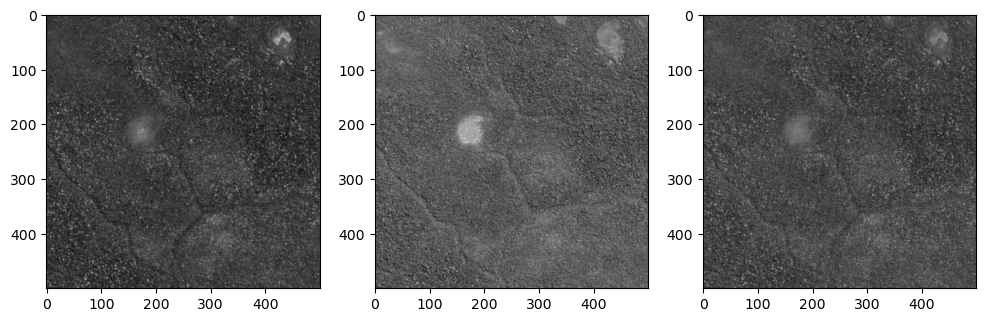

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))
ax1.imshow(red, cmap='gray')
ax2.imshow(green, cmap='gray')
ax3.imshow(blue, cmap='gray')

Using `Numpy` we can stack the previous arrays and use `Matplotlib` to plot a color image, but first we need to normalize their values:

In [30]:
import numpy

In [31]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

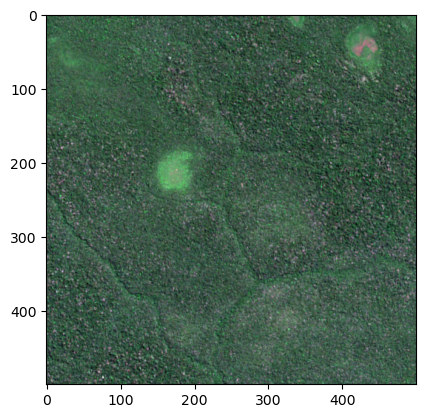

In [32]:
rgb = numpy.dstack((normalize(red), normalize(green), normalize(blue)))
plt.imshow(rgb)

# Retrieving Image Files
<hr style="border:1px solid #0077b9;">

The file related to an asset can be retrieved through the `download` method. The cell code below shows ho to download the image file associated to the asset into a folder named `img`:

In [33]:
# import os
# from urllib.parse import urlparse

# import requests
# from pystac import Asset
# from tqdm import tqdm

# def download(asset: Asset, directory: str = None, chunk_size: int = 1024 * 16, **request_options) -> str:
#     """Smart download STAC Item asset.

#     This method uses a checksum validation and a progress bar to monitor download status.
#     """
#     if directory is None:
#         directory = ''

#     response = requests.get(asset.href, stream=True, **request_options)
#     output_file = os.path.join(directory, urlparse(asset.href)[2].split('/')[-1])
#     os.makedirs(directory, exist_ok=True)
#     total_bytes = int(response.headers.get('content-length', 0))
#     with tqdm.wrapattr(open(output_file, 'wb'), 'write', miniters=1, total=total_bytes, desc=os.path.basename(output_file)) as fout:
#         for chunk in response.iter_content(chunk_size=chunk_size):
#             fout.write(chunk)

In [34]:
# download(assets['BAND15'], 'img')

In order to download all files related to an item, iterate over assets and download each one as following:

In [35]:
# for asset in assets.values():
#     download(asset, 'images')

Note that the URL for a given asset can be retrieved by the property `href`:

In [36]:
blue_asset.href

'http://senegal.coids.inpe.br/bdc/data/s2-16d/v2/014/015/2018/07/28/S2-16D_V2_014015_20180728_B02.tif'

# References
<hr style="border:1px solid #0077b9;">

- [Spatio Temporal Asset Catalog Specification](https://stacspec.org/)


- [Python Client Library for STAC Service](https://pystac-client.readthedocs.io/en/latest/)

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [Image processing on images obtained through STAC](./stac-image-processing.ipynb)